In [1]:
# a
from tensorflow.keras.datasets import mnist

print("Nguyễn Nhật Thanh - 6351071065")
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Nguyễn Nhật Thanh - 6351071065
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
#b
print("Train shape:", train_images.shape)
print("Test shape:", test_images.shape)

print("Nguyễn Nhật Thanh - 6351071065")

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Nguyễn Nhật Thanh - 6351071065


In [3]:
#c
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Nguyễn Nhật Thanh - 6351071065")

Nguyễn Nhật Thanh - 6351071065


In [4]:
# Câu d
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

print("Nguyễn Nhật Thanh - 6351071065")
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

Nguyễn Nhật Thanh - 6351071065


In [5]:
# Câu e
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
models = []
accuracy_per_fold = []
loss_per_fold = []
print("Nguyễn Nhật Thanh - 6351071065")
for fold, (train_index, val_index) in enumerate(kfold.split(train_images)):
    print(f"Training fold {fold + 1}...")
    X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]
    model = create_model()
    history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)
    models.append(model)
    accuracy = history.history['accuracy'][-1]
    loss = history.history['loss'][-1]
    accuracy_per_fold.append(accuracy)
    loss_per_fold.append(loss)

    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")



Nguyễn Nhật Thanh - 6351071065
Training fold 1...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8529 - loss: 0.5023 - val_accuracy: 0.9562 - val_loss: 0.1497
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9520 - loss: 0.1610 - val_accuracy: 0.9680 - val_loss: 0.1085
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9655 - loss: 0.1178 - val_accuracy: 0.9715 - val_loss: 0.0926
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9722 - loss: 0.0908 - val_accuracy: 0.9760 - val_loss: 0.0785
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0761 - val_accuracy: 0.9777 - val_loss: 0.0761
Fold 1 - Accuracy: 0.9757, Loss: 0.0785
Training fold 2...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8551 - loss: 0.4962 - val_accuracy: 0.9547 - val_loss: 0.1588
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9548 - loss: 0.1573 - val_accuracy: 0.9642 - val_loss: 0.1162
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━

In [6]:
# Câu f
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

print("Nguyễn Nhật Thanh - 6351071065")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
print(f"Mean Loss: {mean_loss:.4f}")
print(f"Standard Deviation of Loss: {std_loss:.4f}")

Nguyễn Nhật Thanh - 6351071065
Mean Accuracy: 0.9760
Standard Deviation of Accuracy: 0.0007
Mean Loss: 0.0770
Standard Deviation of Loss: 0.0016


Nguyễn Nhật Thanh - 6351071065


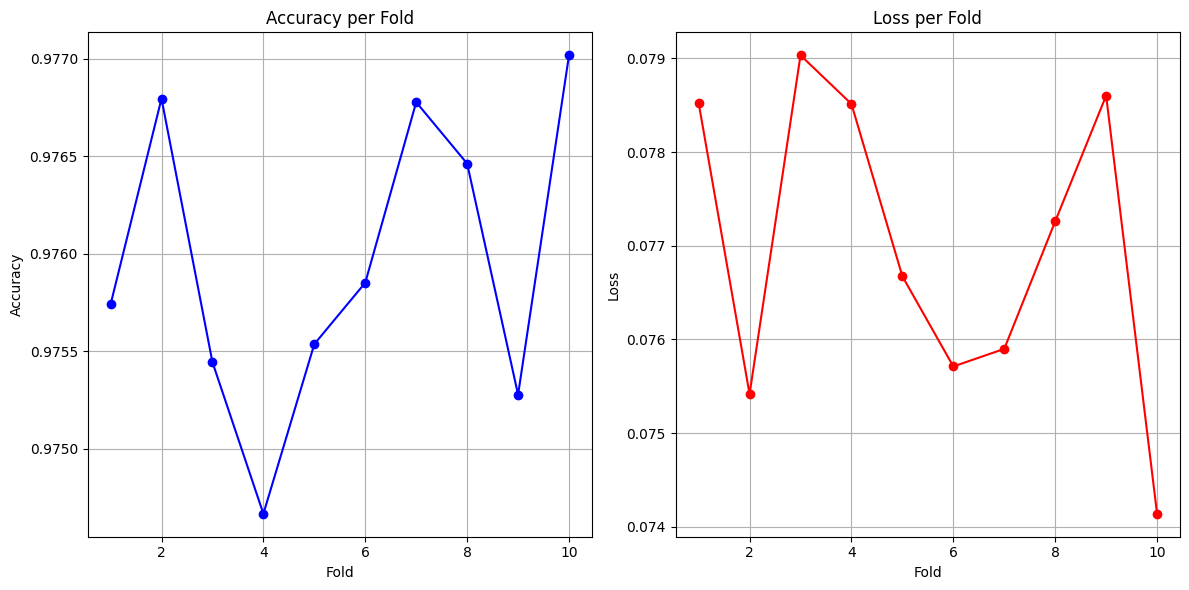

In [7]:
# Câu g
import matplotlib.pyplot as plt

print("Nguyễn Nhật Thanh - 6351071065")
# Accuracy plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), accuracy_per_fold, marker='o', color='b', label='Accuracy')
plt.title("Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), loss_per_fold, marker='o', color='r', label='Loss')
plt.title("Loss per Fold")
plt.xlabel("Fold")
plt.ylabel("Loss")
plt.grid()

plt.tight_layout()
plt.show()

In [8]:
# Câu h
print("Nguyễn Nhật Thanh - 6351071065")

best_fold_index = np.argmax(accuracy_per_fold)
best_model = models[best_fold_index]

y_pred_test = best_model.predict(test_imagesa)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)


Nguyễn Nhật Thanh - 6351071065
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [9]:
# Câu i
from sklearn.metrics import accuracy_score

print("Nguyễn Nhật Thanh - 6351071065")

accuracy_test = accuracy_score(test_labels, y_pred_classes_test)
print(f"Accuracy of the best model on the test set: {accuracy_test:.4f}")

Nguyễn Nhật Thanh - 6351071065
Accuracy of the best model on the test set: 0.9780


In [10]:
# Câu j

from sklearn.metrics import classification_report

print("Nguyễn Nhật Thanh - 6351071065")

report_test = classification_report(test_labels, y_pred_classes_test)
print("Precision, Recall, F1-score for each class:")
print(report_test)

Nguyễn Nhật Thanh - 6351071065
Precision, Recall, F1-score for each class:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Nguyễn Nhật Thanh - 6351071065


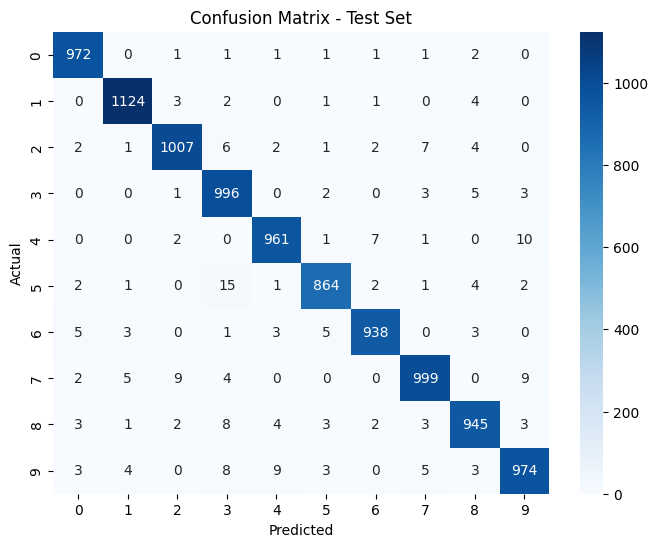

In [11]:
# Câu k
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("Nguyễn Nhật Thanh - 6351071065")
cm_test = confusion_matrix(test_labels, y_pred_classes_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Nguyễn Nhật Thanh - 6351071065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


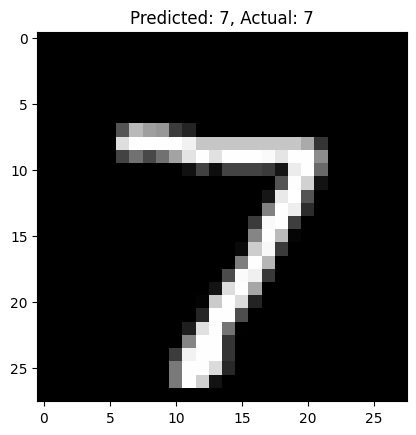

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


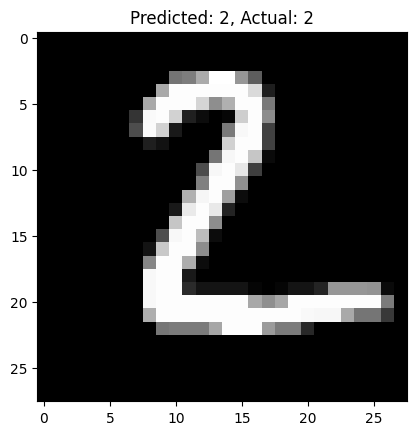

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


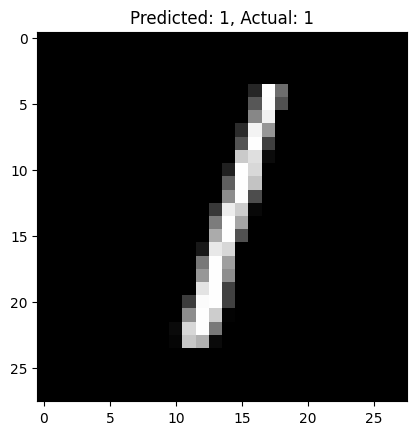

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


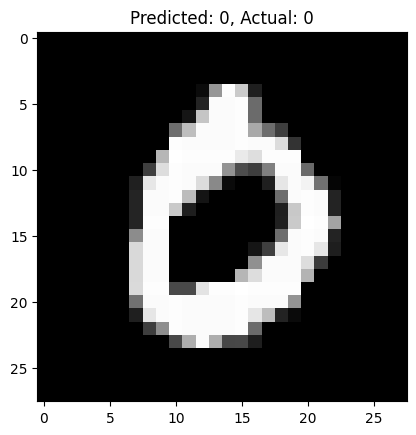

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


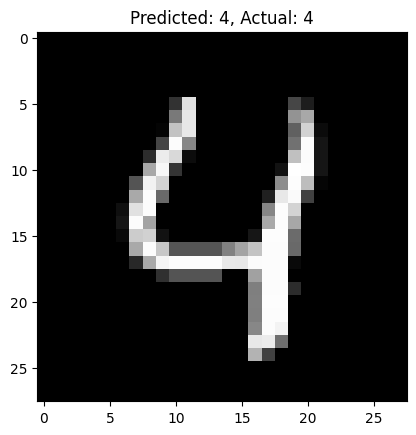

In [12]:
# Câu l
import numpy as np
import matplotlib.pyplot as plt

print("Nguyễn Nhật Thanh - 6351071065")

for i in range(5):
    img = np.expand_dims(test_images[i], axis=0)
    prediction = best_model.predict(img)
    predicted_class = np.argmax(prediction)

    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_class}, Actual: {test_labels[i]}")
    plt.show()